# Milestone 3 - Daniel Krasnov

---

## Research question/interests
Research Question:
I want to answer various questions about restaurant food in India:
1. What is the average quality of the restaurants and their food?
1. How expensive are restaurants?
1. Where should I live in India for the best food?
1. What factors impact how people rate restaurants?
1. What kind of food is available?

# Task 1
## EDA

In [108]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#Read in data
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2") #TODO fix encoding
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

In [109]:
#Inital preview of ZomatoCSV
print(f"Number of rows and columns:\n{zomatoCSV.shape}")
print(f"\nColumns:\n{zomatoCSV.columns}")
print(f"\nData frame summary: ")
print(zomatoCSV.info())

Number of rows and columns:
(9551, 21)

Columns:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Loca

In [110]:
#Inital Preview of countryCodesCSV
print(f"Number of rows and columns:\n{countryCodesCSV.shape}")
print(f"\nColumns:\n{countryCodesCSV.columns}")
print(f"\nData frame summary: ")
print(countryCodesCSV.info())

Number of rows and columns:
(15, 2)

Columns:
Index(['Country Code', 'Country'], dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None


Preview looks good! Now I can go ahead and merge the two tables on the Country Code column

In [112]:
#Merge Tables
zomatoCSV = zomatoCSV.merge(countryCodesCSV, how = "inner",on = "Country Code")
zomatoCSV

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlŘĪ Gurme,208,ŘŃstanbul,"KemankeĀŰ Karamustafa PaĀŰa Mahallesi, RŘĪhtŘĪ...",KarakŪ_y,"KarakŪ_y, ŘŃstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AŘŰacŘĪ,208,ŘŃstanbul,"KoĀŰuyolu Mahallesi, Muhittin ŪžstŪ_ndaŘŰ Cadd...",KoĀŰuyolu,"KoĀŰuyolu, ŘŃstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ŘŃstanbul,"KuruŪ_eĀŰme Mahallesi, Muallim Naci Caddesi, N...",KuruŪ_eĀŰme,"KuruŪ_eĀŰme, ŘŃstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,AĀŰĀŰk Kahve,208,ŘŃstanbul,"KuruŪ_eĀŰme Mahallesi, Muallim Naci Caddesi, N...",KuruŪ_eĀŰme,"KuruŪ_eĀŰme, ŘŃstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


All in all looks we a table of 9551 rows. Now I want to get sense of missing data. To do this I use code adapted from [Handling Missing Data for a Beginner](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436)

In [94]:
zomatoCSV.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

Looks like there are missing values in Cuisines. Generating a heatmap will give us a better sense of the damage.

<AxesSubplot:>

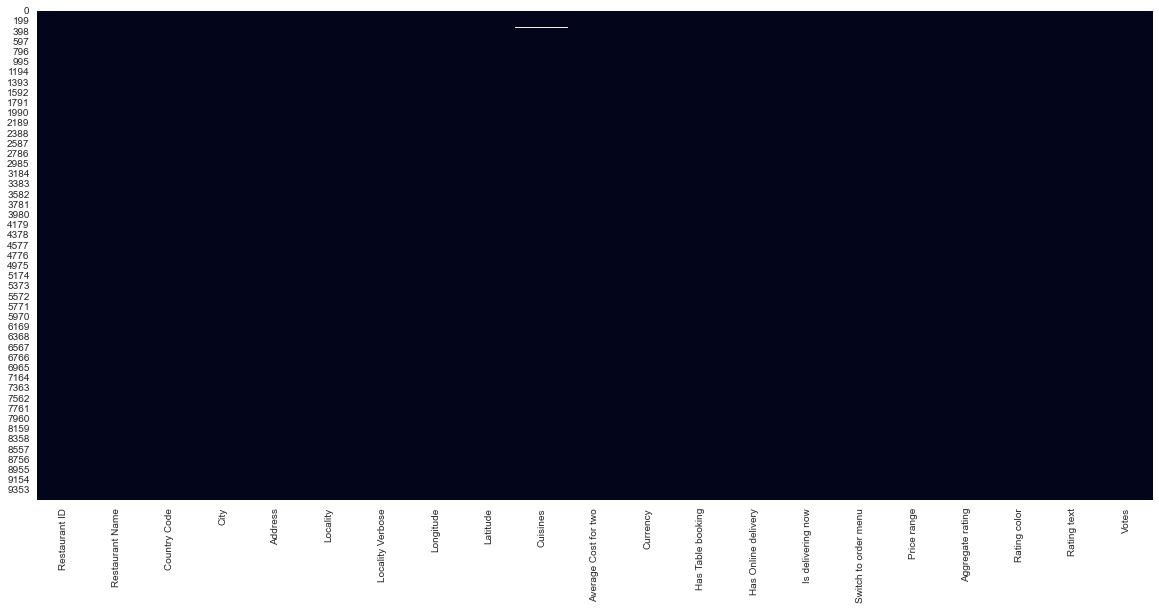

In [95]:
#Set window size
sns.set({'figure.figsize':(20,9)})
#Heatmap of null values
sns.heatmap(zomatoCSV.isnull(), cbar=False)

The amount of null data is very low maybe they use other values to represent missing data?

In [128]:
missing = zomatoCSV[(zomatoCSV['Rating text'].isin(["Not rated"])) == True]
missing[missing['Country'].isin(['India'])]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
871,9299,Aggarwal Sweet Corner,1,Faridabad,"Badarpur Border Chowk Post, Badarpur Border, F...",Badarpur Border,"Badarpur Border, Faridabad",77.302742,28.496292,Mithai,...,No,No,No,No,1,0.0,White,Not rated,1,India
872,9178,Kashyap Vaishno Dhaba,1,Faridabad,"Near Seble Cinema, Dharamveer Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",77.303542,28.495915,North Indian,...,No,No,No,No,1,0.0,White,Not rated,3,India
873,18477319,Total Food Court,1,Faridabad,"B-222, Shishram Complex, Main Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",0.000000,0.000000,"North Indian, Mughlai, Chinese",...,No,No,No,No,1,0.0,White,Not rated,3,India
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,India
878,18377449,Aapki Rasoi,1,Faridabad,"HR-227, 60 Feet Road, Pul Pehlad Pur, Charmwoo...",Charmwood Village,"Charmwood Village, Faridabad",77.291829,28.499064,North Indian,...,No,No,No,No,1,0.0,White,Not rated,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0,India
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India


Indeed, rows with missing ratings have "Not rated" under their Rating text column. I will need to filter this for India to see how it will impact my research questions.

In [121]:
#Dataframe with just India data
print(f"Shape of data frame with just India data: {zomatoCSV[(zomatoCSV['Country'].isin(['India'])) == True].shape}")

#Amount of rows missing ratings from India
missing = zomatoCSV[(zomatoCSV['Rating text'].isin(["Not rated"])) == True]
print(f"Shape of data frame with missing rows in India: {missing[missing['Country'].isin(['India'])].shape}")


Shape of data frame with just India data: (8652, 22)
Shape of data frame with missing rows in India: (2139, 22)


There are 8652 rows with data on India and 2139 of those rows are missing ratings. That being said those rows do have price range and average price for two data so, they are still valuable. Therefore I won't throw them out but I will exclude them from aggreate ratings analyses. Next we need to check for duplicate data.

In [129]:
#Check for any duplicate values
print(f"Any duplicate values: {zomatoCSV.duplicated().any()}")

Any duplicate values: False


Since one of my questions is on types of food I want to see what kind of food is in this data set

In [130]:
#Printing out kinds of food
zomatoCSV.sort_values(by='Cuisines')
pd.DataFrame(zomatoCSV['Cuisines'].unique())

,0
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
1821,Restaurant Cafe
1822,"Desserts, BŪ_rek"
1823,"Burger, Izgara"
1824,"World Cuisine, Patisserie, Cafe"


Wow we have a lot of food!

Now its time for some preliminary correlations and representations. First, I want to see what cities from India are represented in this data set.

<span style="color:red">**Note:** </span>

The map visualization is interactive but don't scroll a lot or it wil lag the whole notebook and potentially crash it. Otherwise it is stable. If it is lagging too much just minimize the cell and it will be fixed.



In [178]:
#Getting list of longs and lats
longs = zomatoCSV[zomatoCSV["Country"].isin(["India"]) == True]["Longitude"]
longs = longs.iloc[::10] #There are too many data points for folium to handle so only plot every 10th long
lats = zomatoCSV[zomatoCSV["Country"].isin(["India"]) == True]["Latitude"]
lats = lats.iloc[::10] #There are too many data points for folium to handle so only plot every 10th lat
locationlist = []
for i in range(len(longs)):
    if(lats.iloc[i] != 0 or longs.iloc[i] != 0): #some longs and lats are 0, this is a missing value so exclude these
        locationlist.append([lats.iloc[i],longs.iloc[i]])

#Plot on map
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup="").add_to(map)
map

Lets get a sense of correlations between values with a correlation matrix (code adapted from course website [firas.moosvi.com](https://firas.moosvi.com/courses/2020_WT2/data301/notes/week08/Seaborn_tutorial.html#loading-data)).

<AxesSubplot:>

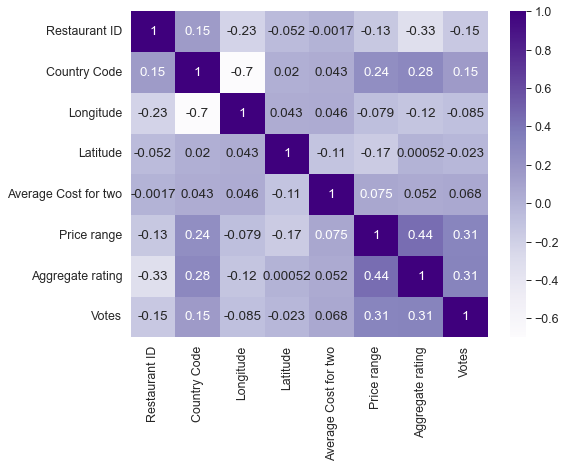

In [191]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corrData = zomatoCSV.corr()
sns.heatmap(corrData, annot=True, cmap='Purples')

It looks like there are a few correlations, for example, Aggregate rating and the price range. I also want to validate that this data set has a good number of votes for India so that I know there is a good sample size.

In [195]:
#Number of votes counted in each country
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    print( f"""{countryName}: {zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() }""")

Phillipines: 8963
Brazil: 1177
United States: 185848
Australia: 2674
Canada: 412
Singapore: 638
UAE: 29611
India: 1187163
Indonesia: 16214
New Zealand: 9721
United Kingdom: 16439
Qatar: 3276
South Africa: 18910
Sri Lanka: 2929
Turkey: 14670


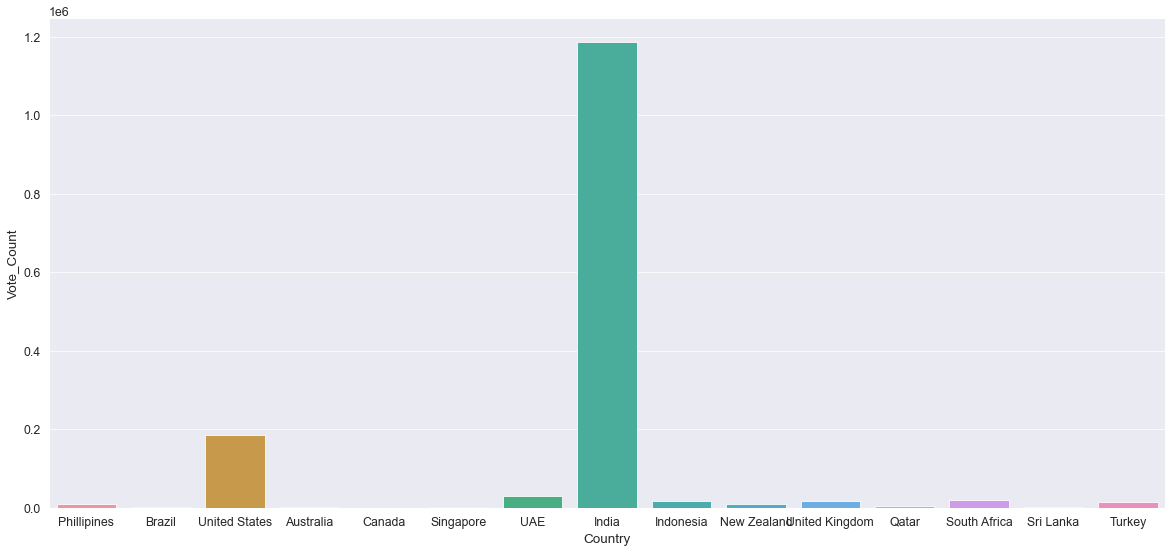

In [193]:
#Converting number of votes counted in each country into a plotable dataframe
country_and_votes = []
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    country_and_votes.append([ countryName, zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() ])

country_and_votes = pd.DataFrame(country_and_votes).rename(columns={0: "Country", 1: "Vote_Count"})
country_and_votes

#plotting country_and_votes
plot = sns.barplot(x="Country" , y="Vote_Count", data=country_and_votes, ci=None)

<AxesSubplot:>

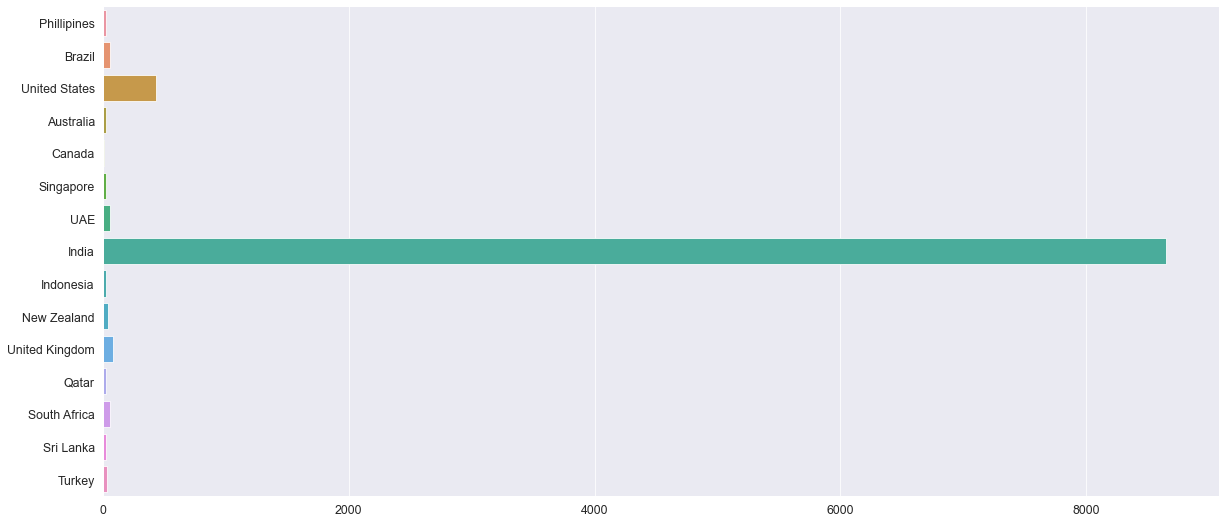

In [194]:
#Counting number of restaurants in each country and plotting them
from collections import Counter
counter = Counter(list(zomatoCSV["Country"]))
y1 = list(counter.keys())
x1 = list(counter.values())
sns.barplot(x = x1, y = y1)

There is an overrepresentation of restaurants and votes from India which will be useful for my research questions. Now that I have a good understanding of my data set I can move on.

# Task 2
## Analysis Pipeline
### Loading Data

In [243]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import folium

#reading in CSVs (Don't need the json data)
zomato_df = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodes_df = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

### Cleaning Data


In [244]:
#Drop uneeded columns
zomato_df = zomato_df.drop(["Address","Rating color","Locality","Locality Verbose","Switch to order menu","Restaurant ID"],axis = 'columns')
#Drop rows with missing values
zomato_df = zomato_df.dropna()

### Processing

In [245]:
zomato_df = zomato_df.rename(columns={"Average Cost for two": "Average Cost for Two", 
                          "Has Table booking": "Has Table Booking",
                          "Has Online delivery": "Has Online Delivery",
                          "Rating text": "Rating Text",
                          "Is delivering now": "Is Delivering Now",
                          "Price Range": "Price Range",
                          "Aggregate rating": "Aggregate Rating",})


### Wrangling Data

In [246]:
#Merge Tables
zomato_df = zomato_df.merge(countryCodesCSV, how = "inner",on = "Country Code")

#Filtering for just India
zomato_df = zomato_df.query('Country=="India"')

#Change indexing
zomato_df = zomato_df.set_index(['City']) \
                     .drop(['Country Code','Country'], axis = 'columns')
zomato_df

,Restaurant Name,Longitude,Latitude,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Price range,Aggregate Rating,Rating Text,Votes
City,,,,,,,,,,,,,
Agra,Jahanpanah,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140
Agra,Rangrezz Restaurant,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71
Agra,Time2Eat - Mama Chicken,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94
Agra,Chokho Jeeman Marwari Jain Bhojanalya,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87
Agra,Pinch Of Spice,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vizag,D Cabana,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,2,3.6,Good,193
Vizag,Kaloreez,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,2,3.7,Good,85
Vizag,Plot 17,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,2,4.3,Very Good,172


# Task 3
## Method Chaining
### Step 1

In [230]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#Method chain 1 - load in/clean zomato.csv
zomato_df = (
 pd.DataFrame(pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")) #TODO fix encoding
 .drop(["Address","Rating color","Rating text","Locality","Locality Verbose","Switch to order menu","Average Cost for two"],axis = 'columns')
 .dropna()
)

#Method chain 2 - load in Country-Code.xlsx
country_df = (
    pd.DataFrame(pd.read_excel("..\\data\\raw\\Country-Code.xlsx"))
)

#Method chain 3 - process/wrangle/merge country_df and zomato_df
zomato_cleaned = (
 pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
 #zomato_df = zomato_df[(zomato_df['Aggregate rating'].isin([0.0])) == False]
 .set_index(['Country','City']) 
 .drop(['Country Code'], axis = 'columns')

)

#Testing output
print(f"Method Chain 1:\n{zomato_df.head()}")
print(f"Method Chain 2:\n{country_df.head()}")
print(f"Method Chain 3:\n{zomato_cleaned.head()}")

Method Chain 1:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

    Longitude   Latitude                          Cuisines          Currency  \
0  121.027535  14.565443        French, Japanese, Desserts  Botswana Pula(P)   
1  121.014101  14.553708                          Japanese  Botswana Pula(P)   
2  121.056831  14.581404  Seafood, Asian, Filipino, Indian  Botswana Pula(P)   
3  121.056475  14.585318                   Japanese, Sushi  Botswana Pula(P)   
4  121.057508  14.584450                  Japanese, Korean  Botswana Pula(P)   

  Has Table booking Has Online delivery Is del

In [ ]:
def filter_zomato(zomato_df):
    zomato_df = zomato_df[(zomato_df['Aggregate rating'].isin([0.0])) == False]
    return zomato_df

### Step 2

In [170]:
def clean_and_merge_zomato(zomato_file_path, country_codes_file_path):
    """
    Loads, cleans, processes, and wrangles zomato.csv and Country-Code.xlsx
    
    Arguments:
    zomato_file_path - (str) the file path for the zomato.csv
    
    country_codes_file_path - (str) the file path for the Country-Code.xlsx
    """
    
    #Method chain 1 - load in/clean zomato.csv
    zomato_df = (
     pd.DataFrame(pd.read_csv(zomato_file_path , encoding = "maclatin2")) #TODO fix encoding
     .drop(["Address","Rating color","Rating text","Locality","Locality Verbose","Switch to order menu","Average Cost for two"],axis = 'columns')
     .dropna()
    )
    
    #Method chain 2 - load in Country-Code.xlsx 
    country_df = (
        pd.DataFrame(pd.read_excel(country_codes_file_path))
    )
    
    #Method chain 3 process/wrangle/merge country_df and zomato_df
    zomato_cleaned = (
     pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
     #filter data set here - use assign
     .set_index(['Country','City']) 
     .drop(['Country Code'], axis = 'columns')
    )
    
    return zomato_cleaned

In [171]:
#Testing function
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

Restaurant ID           Restaurant Name  \
Country     City                                                        
Phillipines Makati City             6317637          Le Petit Souffle   
            Makati City             6304287          Izakaya Kikufuji   
            Mandaluyong City        6300002    Heat - Edsa Shangri-La   
            Mandaluyong City        6318506                      Ooma   
            Mandaluyong City        6314302               Sambo Kojin   
...                                     ...                       ...   
Turkey      ŘŃstanbul               5915730              NamlŘĪ Gurme   
            ŘŃstanbul               5908749             Ceviz AŘŰacŘĪ   
            ŘŃstanbul               5915807                     Huqqa   
            ŘŃstanbul               5916112              AĀŰĀŰk Kahve   
            ŘŃstanbul               5927402  Walter's Coffee Roastery   

                               Longitude   Latitude  \
Country     City                                      
Phillipines Makati City       121.027535  14.565443   
            Makati City       121.014101  14.553708   
            Mandaluyong City  121.056831  14.581404   
            Mandaluyong City  121.056475  14.585318   
            Mandaluyong City  121.057508  14.584450   
...                                  ...        ...   
Turkey      ŘŃstanbul          28.977392  41.022793   
            ŘŃstanbul          29.041297  41.009847   
            ŘŃstanbul          29.034640  41.055817   
            ŘŃstanbul          29.036019  41.057979   
            ŘŃstanbul          29.026016  40.984776   

                                                      Cuisines  \
Country     City                                                 
Phillipines Makati City             French, Japanese, Desserts   
            Makati City                               Japanese   
            Mandaluyong City  Seafood, Asian, Filipino, Indian   
            Mandaluyong City                   Japanese, Sushi   
            Mandaluyong City                  Japanese, Korean   
...                                                        ...   
Turkey      ŘŃstanbul                                  Turkish   
            ŘŃstanbul          World Cuisine, Patisserie, Cafe   
            ŘŃstanbul                   Italian, World Cuisine   
            ŘŃstanbul                          Restaurant Cafe   
            ŘŃstanbul                                     Cafe   

                                      Currency Has Table booking  \
Country     City                                                   
Phillipines Makati City       Botswana Pula(P)               Yes   
            Makati City       Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)                No   
            Mandaluyong City  Botswana Pula(P)               Yes   
...                                        ...               ...   
Turkey      ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   

                             Has Online delivery Is delivering now  \
Country     City                                                     
Phillipines Makati City                       No                No   
            Makati City                       No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
...                                          ...               ...   
Turkey      ŘŃstanbul                         No            

### Step 3

In [8]:
#import my function
from project_functions1 import clean_and_merge_zomato
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

Restaurant ID           Restaurant Name  \
Country     City                                                        
Phillipines Makati City             6317637          Le Petit Souffle   
            Makati City             6304287          Izakaya Kikufuji   
            Mandaluyong City        6300002    Heat - Edsa Shangri-La   
            Mandaluyong City        6318506                      Ooma   
            Mandaluyong City        6314302               Sambo Kojin   
...                                     ...                       ...   
Turkey      ŘŃstanbul               5915730              NamlŘĪ Gurme   
            ŘŃstanbul               5908749             Ceviz AŘŰacŘĪ   
            ŘŃstanbul               5915807                     Huqqa   
            ŘŃstanbul               5916112              AĀŰĀŰk Kahve   
            ŘŃstanbul               5927402  Walter's Coffee Roastery   

                               Longitude   Latitude  \
Country     City                                      
Phillipines Makati City       121.027535  14.565443   
            Makati City       121.014101  14.553708   
            Mandaluyong City  121.056831  14.581404   
            Mandaluyong City  121.056475  14.585318   
            Mandaluyong City  121.057508  14.584450   
...                                  ...        ...   
Turkey      ŘŃstanbul          28.977392  41.022793   
            ŘŃstanbul          29.041297  41.009847   
            ŘŃstanbul          29.034640  41.055817   
            ŘŃstanbul          29.036019  41.057979   
            ŘŃstanbul          29.026016  40.984776   

                                                      Cuisines  \
Country     City                                                 
Phillipines Makati City             French, Japanese, Desserts   
            Makati City                               Japanese   
            Mandaluyong City  Seafood, Asian, Filipino, Indian   
            Mandaluyong City                   Japanese, Sushi   
            Mandaluyong City                  Japanese, Korean   
...                                                        ...   
Turkey      ŘŃstanbul                                  Turkish   
            ŘŃstanbul          World Cuisine, Patisserie, Cafe   
            ŘŃstanbul                   Italian, World Cuisine   
            ŘŃstanbul                          Restaurant Cafe   
            ŘŃstanbul                                     Cafe   

                                      Currency Has Table booking  \
Country     City                                                   
Phillipines Makati City       Botswana Pula(P)               Yes   
            Makati City       Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)                No   
            Mandaluyong City  Botswana Pula(P)               Yes   
...                                        ...               ...   
Turkey      ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   

                             Has Online delivery Is delivering now  \
Country     City                                                     
Phillipines Makati City                       No                No   
            Makati City                       No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
...                                          ...               ...   
Turkey      ŘŃstanbul                         No            

# Task 4

Research Question:
If you're using the Zomato app, how does where you are in the world affect the following:

1. The quality of food you will find on Zomato (based on rating column)?
1. The price range you will find on Zomato (based on price range column)?
1. The types of food you will find on Zomato (based on cuisine column)?

### Part 1

To answer how where I am in the world affects the quality of my food on Zomato, I'm going to want to see the distribution of aggregate ratings throughout the countries in my dataset:

In [81]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#reading in CSVs (Don't need the json data)
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2") #TODO fix encoding
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")
#Merge Tables
zomatoCSV = zomatoCSV.merge(countryCodesCSV, how = "inner",on = "Country Code")
zomatoCSV
#Change indexing


#zomatoCSV['Aggregate rating per 100 votes'] = zomatoCSV['Aggregate rating']/zomatoCSV.groupby(["Country"])["Votes"].sum()
#zomatoCSV

zomatoCSV['Aggregate rating']/zomatoCSV.groupby(["Country"])["Votes"].sum()


C:\Users\Daniel\miniconda3\lib\site-packages\pandas\core\roperator.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return right / left


ValueError: operands could not be broadcast together with shapes (33,2) (15,) 

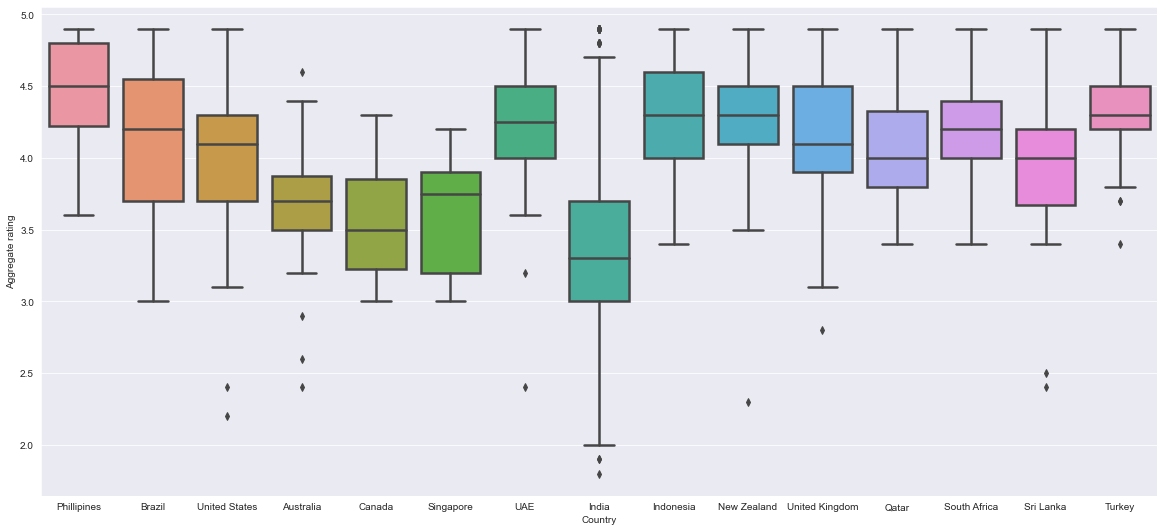

In [227]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from project_functions1 import clean_and_merge_zomato

#Load in data frame
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
#CHANGE THIS LATER!!! - Manual filter for removies missing values
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]
plot = sns.boxplot(x="Country", y="Aggregate rating", data=zomato.reset_index(), linewidth=2.5 )

To understand amount of data collected for each country I will print the total number of votes recorded for each country and the total number of restaurants for each country:

In [228]:
#Number of votes counted in each country

print("Total number of votes in each country:")
#These part of the analysis is easier to write with rest indexes
zomato = zomato.reset_index()

for index, countryName in enumerate(zomato["Country"].unique()):
    print(f"{countryName}: {zomato[zomato['Country'].isin([countryName])]['Votes'].sum()}")

#Number of restaurants in each country
counter = Counter(list(zomato["Country"]))
print("\nTotal number of restaurants in each country:")
for key, value in counter.items():
    print(f"{key}: {value}")


Total number of votes in each country:
Phillipines: 8963
Brazil: 1170
United States: 183116
Australia: 2674
Canada: 412
Singapore: 638
UAE: 29611
India: 1185310
Indonesia: 16214
New Zealand: 9721
United Kingdom: 16436
Qatar: 3276
South Africa: 18910
Sri Lanka: 2929
Turkey: 14670

Total number of restaurants in each country:
Phillipines: 22
Brazil: 55
United States: 422
Australia: 24
Canada: 4
Singapore: 20
UAE: 60
India: 6513
Indonesia: 21
New Zealand: 40
United Kingdom: 79
Qatar: 20
South Africa: 60
Sri Lanka: 20
Turkey: 34


Here we can see the average ratings of restaurants thoughout the countries in the data set some notable features are:
1. The Philippines has the highest average aggregate rating of 4.5—time to find a Filipino chef!
1. This dataset is very India oreientated with 1185310 votes and 6513 restaurants
1. Data from Canada can all but be ignored since it has a restaurant count of 4

This gives us an overall sense of quality of food by country but how about by city or region? Do dense cities have higher rated food than rural farmlands? To visualize this we can plot all restauarnts on a map whose average rating is greater than or equal to 4.


In [229]:
#I can change the dataframe back to heirarchal indexes for this part
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
#CHANGE THIS LATER!!! - Manual filter for removies missing values
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]

#Getting list of long/lat
long = zomato.loc['United States']['Longitude']
lat = zomato.loc['United States']['Latitude']
rating = zomato.loc['United']
locationlist = [] 




for index in range(0, (len(long))):
    locationlist.append([lat[index],long[index]])

#Creating interactive map for USA
map = folium.Map(location=[39.7392,-104.9903], zoom_start=3)
for point in range(0, len(#List length here)):
    folium.Marker(locationlist[point], popup = zomato[]).add_to(map)
map  


# Testing 

<AxesSubplot:>

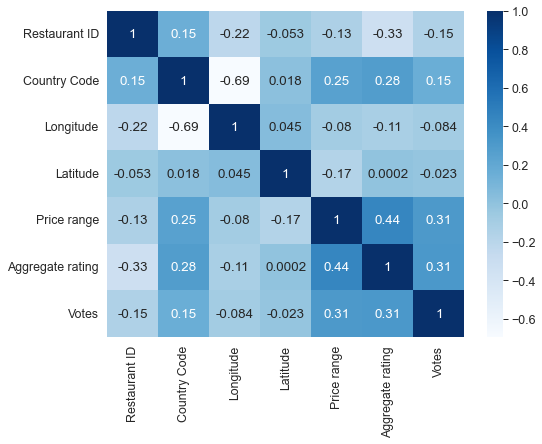

In [67]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = zomatoCSV.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [ ]:
Almost every majoy city in India is represented! Next, whats the average rating of restaurants in India? What about by city?

In [ ]:
#Creating India specific data frame
zomatoIndia = zomatoCSV[(zomatoCSV['Country'].isin(['India'])) == True]

plot = sns.boxplot(x="City", y="Aggregate rating", data=zomatoIndia[(zomatoIndia['Rating text'].isin(["Not rated"])) == False], linewidth=2.5 )

In [ ]:
#Learning to use assign
.assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]

In [39]:
#seperating cusines into a list of strings

#Importing counter
from collections import Counter

#Getting a dictionary of the counts of each unique food type
#zomatoCSV['Cuisines_split'] = zomatoCSV['Cuisines'].str.split(',')
seq = list((zomatoCSV.loc['Restaurant Name'].value_counts()).index)
dict = {key.strip(): value for key, value in Counter(x for xs in seq for x in set(xs)).items()}
dict

KeyError: 'Restaurant Name'

In [101]:
#Normalizing Testing

#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from project_functions1 import clean_and_merge_zomato

#Load in data frame
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
#CHANGE THIS LATER!!! - Manual filter for removies missing values
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]
zomatoIndia = zomato.loc["India"]
zomatoIndia.reset_index
zomatoIndia.index.unique()





Index(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa', 'Gurgaon', 'Guwahati',
       'Hyderabad', 'Indore', 'Jaipur', 'Kanpur', 'Kochi', 'Kolkata',
       'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali', 'Mumbai', 'Mysore',
       'Nagpur', 'Nashik', 'New Delhi', 'Noida', 'Panchkula', 'Patna',
       'Puducherry', 'Pune', 'Ranchi', 'Secunderabad', 'Surat', 'Vadodara',
       'Varanasi', 'Vizag'],
      dtype='object', name='City')

In [107]:
locationlist = [[27.1767,78.0081],[23.0225,72.5714],[25.4358,81.8463],[31.6340,74.8723],[19.8762,75.3433],[12.9716, 77.5946],[23.2599,77.4126],[20.2961,85.8245],[30.7333,76.7794]]
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup="").add_to(map)
map

In [225]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import folium

#reading in CSVs (Don't need the json data)
zomato_df = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodes_df = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")
#Drop uneeded columns
zomato_df = zomato_df.drop(["Address","Rating color","Locality","Locality Verbose","Switch to order menu","Restaurant ID"],axis = 'columns')
#Drop rows with missing values
zomato_df = zomato_df.dropna()
zomato_df.rename(columns={"Average Cost for two": "Average Cost for Two", 
                          "Has Table booking": "Has Table Booking",
                          "Has Online delivery": "Has Online Delivery",
                          "Rating text": "Rating Text",
                          "Is delivering now": "Is Delivering Now",
                          "Price Range": "Price Range",
                          "Aggregate rating": "Aggregate Rating",})
#Merge Tables
zomato_df = zomato_df.merge(countryCodesCSV, how = "inner",on = "Country Code")
zomato_df
x = zomato_df.query('Country=="India"')
x[x["Country"].isin(["ICanada"]) ]
#x = zomato_df[zomato_df["Country"].isin(["India"])]
#x = zomato_df.assign(Country= zomato_df["Country"].isin(["India"]))

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country


In [ ]:
#zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]
#Learning to use assign
#zomato.assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))


In [ ]:
#Change indexing
zomato_df = zomato_df.set_index(['Country','City']) \
                     .drop(['Country Code'], axis = 'columns')
zomato_df